In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("data.csv")
df.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


In [3]:
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [4]:
df[df['artists'].apply(lambda x: 'SHY Martin' in x)]
#add ability to add more songs to database based on lookup

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
56499,0.188,2016,0.0225,"['Mike Perry', 'SHY Martin']",0.632,183414,0.575,0,2CPqh63wRVscbceKcPxwvv,0.000002,5,0.104,-6.478,1,The Ocean (feat. Shy Martin),73,2016-04-15,0.029,90.037


Scaling the data

In [ ]:
from sklearn.preprocessing import StandardScaler

#scale the numerical features we care about so that no feature has more weight than another
numerical_features = ['valence', 'acousticness', 'danceability', 'energy', 
                      'instrumentalness', 'liveness', 'speechiness', 'tempo']

std_scaler= StandardScaler()
X_scaled = std_scaler.fit_transform(df[numerical_features])
X_scaled.shape

(170653, 8)

K Means Algorithm and Elbow Method

In [7]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(X_scaled, test_size=0.2, random_state=42)

In [9]:
from sklearn.cluster import KMeans
inertia = [] 
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(train_data)
    inertia.append(kmeans.inertia_) #this is the sum of costs within clusters

Text(0.5, 1.0, 'Elbow Method')

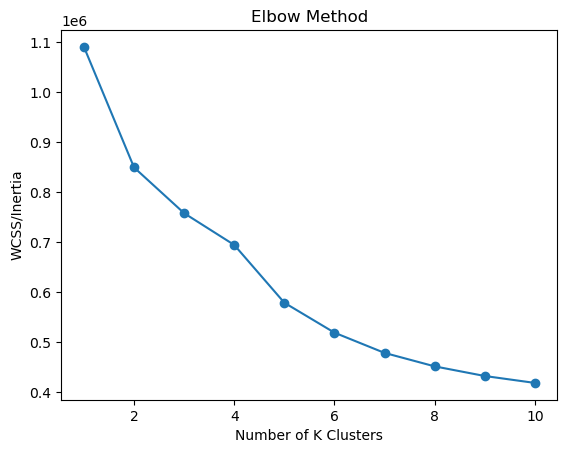

In [35]:
plt.plot(range(1,11), inertia, marker = 'o')
plt.xlabel("Number of K Clusters")
plt.ylabel("WCSS/Inertia")
plt.title('Elbow Method')

From here, we see that K=5 is the sweet spot. However, let's see if PCA dimensionality reduction can improve clustering. 

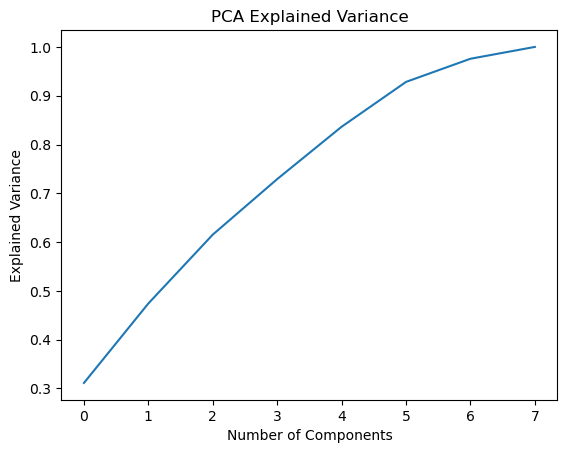

In [42]:
from sklearn.decomposition import PCA
import numpy as np


pca = PCA()
X_pca = pca.fit_transform(train_data)

# Plot explained variance ratio based on pca components
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('PCA Explained Variance')
plt.show()

In [ ]:
pca = PCA(n_components=6)
X_reduced = pca.fit_transform(train_data)

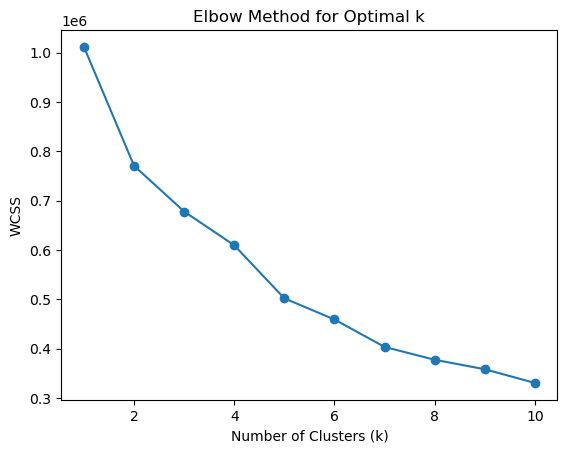

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = [] 

for k in range(1, 11):  
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_reduced)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()


Seems like PCA, and then clustering, improved our WCSS at K=5.